In [7]:
import flair.datasets
from flair.data import Sentence
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentRNNEmbeddings, StackedEmbeddings
from flair.models.text_regression_model import TextRegressor
# from flair.models import TextClassifier
from flair.visual.training_curves import Plotter
from flair.trainers import ModelTrainer
import matplotlib
import os

In [2]:
os.getenv('FLAIR_CACHE_ROOT') 

'/media/joey/Samsung_T5/FLAIR_CACHE_ROOT/'

In [3]:
corpus = flair.datasets.SENTEVAL_SST_GRANULAR()
print(corpus)

2021-01-28 12:22:24,151 Reading data from /media/joey/Samsung_T5/FLAIR_CACHE_ROOT/datasets/senteval_sst_granular
2021-01-28 12:22:24,151 Train: /media/joey/Samsung_T5/FLAIR_CACHE_ROOT/datasets/senteval_sst_granular/train.txt
2021-01-28 12:22:24,152 Dev: /media/joey/Samsung_T5/FLAIR_CACHE_ROOT/datasets/senteval_sst_granular/dev.txt
2021-01-28 12:22:24,153 Test: /media/joey/Samsung_T5/FLAIR_CACHE_ROOT/datasets/senteval_sst_granular/test.txt
Corpus: 8544 train + 1101 dev + 2210 test sentences


In [4]:
word_embeddings = [WordEmbeddings('glove'), FlairEmbeddings('news-forward'), FlairEmbeddings('news-backward')]

In [5]:
# 4. initialize document embedding by passing list of word embeddings
# Can choose between many RNN types (GRU by default, to change use rnn_type parameter)
document_embeddings = DocumentRNNEmbeddings(word_embeddings, hidden_size=256)

# 5. create the text classifier
regressor = TextRegressor(document_embeddings)

# 6. initialize the text classifier trainer
trainer = ModelTrainer(regressor, corpus)

# 7. start the training
trainer.train('model/sentiment_regressor',
              learning_rate=0.1,
              mini_batch_size=32,
              anneal_factor=0.5,
              patience=5,
              monitor_train=True,
              monitor_test=True,
              max_epochs=200,
              checkpoint=True)

2021-01-28 12:22:29,534 Using REGRESSION - experimental
2021-01-28 12:22:29,535 ----------------------------------------------------------------------------------------------------
2021-01-28 12:22:29,536 Model: "TextRegressor(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): WordEmbeddings('glove')
      (list_embedding_1): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.05, inplace=False)
          (encoder): Embedding(300, 100)
          (rnn): LSTM(100, 2048)
          (decoder): Linear(in_features=2048, out_features=300, bias=True)
        )
      )
      (list_embedding_2): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.05, inplace=False)
          (encoder): Embedding(300, 100)
          (rnn): LSTM(100, 2048)
          (decoder): Linear(in_features=2048, out_features=300, bias=True)
        )
      )
    )
    (word_reprojection_map): Linear(in_features=4196, o

2021-01-28 12:25:29,695 epoch 4 - iter 260/267 - loss 1.37552502 - samples/sec: 526.09 - lr: 0.100000
2021-01-28 12:25:30,120 ----------------------------------------------------------------------------------------------------
2021-01-28 12:25:30,120 EPOCH 4 done: loss 1.3766 - lr 0.1000000
2021-01-28 12:25:44,415 DEV : loss 0.04187418147921562 - score 0.6009
2021-01-28 12:25:47,486 TEST : loss 0.04473187401890755 - score 0.6145
2021-01-28 12:25:47,655 BAD EPOCHS (no improvement): 0
saving best model
2021-01-28 12:25:51,774 ----------------------------------------------------------------------------------------------------
2021-01-28 12:25:53,428 epoch 5 - iter 26/267 - loss 1.28959649 - samples/sec: 503.78 - lr: 0.100000
2021-01-28 12:25:55,055 epoch 5 - iter 52/267 - loss 1.36823194 - samples/sec: 511.64 - lr: 0.100000
2021-01-28 12:25:56,737 epoch 5 - iter 78/267 - loss 1.35921763 - samples/sec: 495.10 - lr: 0.100000
2021-01-28 12:25:58,344 epoch 5 - iter 104/267 - loss 1.33991868 -

saving best model
2021-01-28 12:28:57,827 ----------------------------------------------------------------------------------------------------
2021-01-28 12:28:59,333 epoch 10 - iter 26/267 - loss 1.11088104 - samples/sec: 553.23 - lr: 0.100000
2021-01-28 12:29:00,791 epoch 10 - iter 52/267 - loss 1.05918686 - samples/sec: 571.20 - lr: 0.100000
2021-01-28 12:29:02,282 epoch 10 - iter 78/267 - loss 1.11461134 - samples/sec: 558.70 - lr: 0.100000
2021-01-28 12:29:03,728 epoch 10 - iter 104/267 - loss 1.11538802 - samples/sec: 575.85 - lr: 0.100000
2021-01-28 12:29:05,155 epoch 10 - iter 130/267 - loss 1.10718161 - samples/sec: 583.67 - lr: 0.100000
2021-01-28 12:29:06,579 epoch 10 - iter 156/267 - loss 1.11425896 - samples/sec: 585.20 - lr: 0.100000
2021-01-28 12:29:08,033 epoch 10 - iter 182/267 - loss 1.11487688 - samples/sec: 572.78 - lr: 0.100000
2021-01-28 12:29:09,477 epoch 10 - iter 208/267 - loss 1.10403242 - samples/sec: 576.78 - lr: 0.100000
2021-01-28 12:29:10,907 epoch 10 - i

2021-01-28 12:32:00,010 epoch 15 - iter 104/267 - loss 1.02683201 - samples/sec: 567.04 - lr: 0.100000
2021-01-28 12:32:01,528 epoch 15 - iter 130/267 - loss 1.02801270 - samples/sec: 548.54 - lr: 0.100000
2021-01-28 12:32:03,050 epoch 15 - iter 156/267 - loss 1.02959628 - samples/sec: 547.10 - lr: 0.100000
2021-01-28 12:32:04,559 epoch 15 - iter 182/267 - loss 1.01580935 - samples/sec: 552.01 - lr: 0.100000
2021-01-28 12:32:06,093 epoch 15 - iter 208/267 - loss 1.01921484 - samples/sec: 543.07 - lr: 0.100000
2021-01-28 12:32:07,615 epoch 15 - iter 234/267 - loss 1.02874845 - samples/sec: 547.16 - lr: 0.100000
2021-01-28 12:32:09,118 epoch 15 - iter 260/267 - loss 1.02378011 - samples/sec: 553.80 - lr: 0.100000
2021-01-28 12:32:09,516 ----------------------------------------------------------------------------------------------------
2021-01-28 12:32:09,517 EPOCH 15 done: loss 1.0278 - lr 0.1000000
2021-01-28 12:32:22,974 DEV : loss 0.029249945655465126 - score 0.6845
2021-01-28 12:32:

2021-01-28 12:35:04,368 epoch 20 - iter 234/267 - loss 0.97371370 - samples/sec: 561.61 - lr: 0.100000
2021-01-28 12:35:05,859 epoch 20 - iter 260/267 - loss 0.97148453 - samples/sec: 558.32 - lr: 0.100000
2021-01-28 12:35:06,263 ----------------------------------------------------------------------------------------------------
2021-01-28 12:35:06,263 EPOCH 20 done: loss 0.9690 - lr 0.1000000
2021-01-28 12:35:20,174 DEV : loss 0.028844419866800308 - score 0.6961
2021-01-28 12:35:23,143 TEST : loss 0.03169399872422218 - score 0.6942
2021-01-28 12:35:23,305 BAD EPOCHS (no improvement): 0
saving best model
2021-01-28 12:35:27,382 ----------------------------------------------------------------------------------------------------
2021-01-28 12:35:28,924 epoch 21 - iter 26/267 - loss 0.90787500 - samples/sec: 540.41 - lr: 0.100000
2021-01-28 12:35:30,454 epoch 21 - iter 52/267 - loss 0.95889126 - samples/sec: 544.23 - lr: 0.100000
2021-01-28 12:35:31,961 epoch 21 - iter 78/267 - loss 0.953

2021-01-28 12:38:21,014 TEST : loss 0.029032770544290543 - score 0.7109
2021-01-28 12:38:21,182 BAD EPOCHS (no improvement): 3
2021-01-28 12:38:23,126 ----------------------------------------------------------------------------------------------------
2021-01-28 12:38:24,600 epoch 26 - iter 26/267 - loss 0.91058745 - samples/sec: 565.35 - lr: 0.100000
2021-01-28 12:38:26,018 epoch 26 - iter 52/267 - loss 0.90193225 - samples/sec: 587.18 - lr: 0.100000
2021-01-28 12:38:27,470 epoch 26 - iter 78/267 - loss 0.89624685 - samples/sec: 573.98 - lr: 0.100000
2021-01-28 12:38:28,923 epoch 26 - iter 104/267 - loss 0.89980753 - samples/sec: 573.30 - lr: 0.100000
2021-01-28 12:38:30,362 epoch 26 - iter 130/267 - loss 0.90976209 - samples/sec: 578.54 - lr: 0.100000
2021-01-28 12:38:31,802 epoch 26 - iter 156/267 - loss 0.92473081 - samples/sec: 578.44 - lr: 0.100000
2021-01-28 12:38:33,311 epoch 26 - iter 182/267 - loss 0.92023130 - samples/sec: 552.01 - lr: 0.100000
2021-01-28 12:38:34,806 epoch 

2021-01-28 12:41:20,688 epoch 31 - iter 78/267 - loss 0.81078848 - samples/sec: 550.63 - lr: 0.050000
2021-01-28 12:41:22,208 epoch 31 - iter 104/267 - loss 0.82449370 - samples/sec: 547.84 - lr: 0.050000
2021-01-28 12:41:23,713 epoch 31 - iter 130/267 - loss 0.82524988 - samples/sec: 553.64 - lr: 0.050000
2021-01-28 12:41:25,230 epoch 31 - iter 156/267 - loss 0.81419687 - samples/sec: 548.84 - lr: 0.050000
2021-01-28 12:41:26,726 epoch 31 - iter 182/267 - loss 0.81447075 - samples/sec: 556.95 - lr: 0.050000
2021-01-28 12:41:28,696 epoch 31 - iter 208/267 - loss 0.81991136 - samples/sec: 422.61 - lr: 0.050000
2021-01-28 12:41:30,202 epoch 31 - iter 234/267 - loss 0.81853612 - samples/sec: 553.20 - lr: 0.050000
2021-01-28 12:41:31,729 epoch 31 - iter 260/267 - loss 0.82108774 - samples/sec: 545.27 - lr: 0.050000
2021-01-28 12:41:32,114 ----------------------------------------------------------------------------------------------------
2021-01-28 12:41:32,115 EPOCH 31 done: loss 0.8221 -

2021-01-28 12:44:22,674 epoch 36 - iter 208/267 - loss 0.77868328 - samples/sec: 559.55 - lr: 0.050000
2021-01-28 12:44:24,191 epoch 36 - iter 234/267 - loss 0.77254532 - samples/sec: 549.10 - lr: 0.050000
2021-01-28 12:44:25,683 epoch 36 - iter 260/267 - loss 0.77756625 - samples/sec: 558.21 - lr: 0.050000
2021-01-28 12:44:26,079 ----------------------------------------------------------------------------------------------------
2021-01-28 12:44:26,080 EPOCH 36 done: loss 0.7775 - lr 0.0500000
2021-01-28 12:44:39,566 DEV : loss 0.0254924688488245 - score 0.7175
2021-01-28 12:44:42,551 TEST : loss 0.027417948469519615 - score 0.7198
2021-01-28 12:44:42,720 BAD EPOCHS (no improvement): 5
2021-01-28 12:44:44,719 ----------------------------------------------------------------------------------------------------
2021-01-28 12:44:46,283 epoch 37 - iter 26/267 - loss 0.76027369 - samples/sec: 532.39 - lr: 0.050000
2021-01-28 12:44:47,775 epoch 37 - iter 52/267 - loss 0.76333914 - samples/se

2021-01-28 12:47:18,856 EPOCH 41 done: loss 0.7157 - lr 0.0250000
2021-01-28 12:47:32,447 DEV : loss 0.024483535438776016 - score 0.7268
2021-01-28 12:47:35,448 TEST : loss 0.0260165985673666 - score 0.7326
2021-01-28 12:47:35,615 BAD EPOCHS (no improvement): 0
saving best model
2021-01-28 12:47:39,863 ----------------------------------------------------------------------------------------------------
2021-01-28 12:47:41,385 epoch 42 - iter 26/267 - loss 0.67445182 - samples/sec: 547.57 - lr: 0.025000
2021-01-28 12:47:43,318 epoch 42 - iter 52/267 - loss 0.70419286 - samples/sec: 430.82 - lr: 0.025000
2021-01-28 12:47:44,833 epoch 42 - iter 78/267 - loss 0.70322861 - samples/sec: 549.77 - lr: 0.025000
2021-01-28 12:47:46,384 epoch 42 - iter 104/267 - loss 0.71835660 - samples/sec: 537.07 - lr: 0.025000
2021-01-28 12:47:47,874 epoch 42 - iter 130/267 - loss 0.71022494 - samples/sec: 558.95 - lr: 0.025000
2021-01-28 12:47:49,393 epoch 42 - iter 156/267 - loss 0.70783109 - samples/sec: 54

2021-01-28 12:50:39,167 epoch 47 - iter 52/267 - loss 0.66664561 - samples/sec: 542.41 - lr: 0.025000
2021-01-28 12:50:40,674 epoch 47 - iter 78/267 - loss 0.67132515 - samples/sec: 552.84 - lr: 0.025000
2021-01-28 12:50:42,216 epoch 47 - iter 104/267 - loss 0.67197534 - samples/sec: 540.11 - lr: 0.025000
2021-01-28 12:50:43,711 epoch 47 - iter 130/267 - loss 0.67703567 - samples/sec: 556.99 - lr: 0.025000
2021-01-28 12:50:45,211 epoch 47 - iter 156/267 - loss 0.68090616 - samples/sec: 555.03 - lr: 0.025000
2021-01-28 12:50:46,717 epoch 47 - iter 182/267 - loss 0.68436500 - samples/sec: 553.01 - lr: 0.025000
2021-01-28 12:50:48,183 epoch 47 - iter 208/267 - loss 0.69226552 - samples/sec: 568.27 - lr: 0.025000
2021-01-28 12:50:49,722 epoch 47 - iter 234/267 - loss 0.69237574 - samples/sec: 541.13 - lr: 0.025000
2021-01-28 12:50:51,204 epoch 47 - iter 260/267 - loss 0.69227281 - samples/sec: 561.97 - lr: 0.025000
2021-01-28 12:50:51,613 ---------------------------------------------------

2021-01-28 12:53:38,630 epoch 52 - iter 182/267 - loss 0.66780311 - samples/sec: 549.42 - lr: 0.025000
2021-01-28 12:53:40,116 epoch 52 - iter 208/267 - loss 0.67621576 - samples/sec: 560.64 - lr: 0.025000
2021-01-28 12:53:41,623 epoch 52 - iter 234/267 - loss 0.67584056 - samples/sec: 552.45 - lr: 0.025000
2021-01-28 12:53:43,139 epoch 52 - iter 260/267 - loss 0.67975580 - samples/sec: 549.41 - lr: 0.025000
2021-01-28 12:53:43,540 ----------------------------------------------------------------------------------------------------
2021-01-28 12:53:43,540 EPOCH 52 done: loss 0.6796 - lr 0.0250000
2021-01-28 12:53:57,079 DEV : loss 0.024553904309868813 - score 0.7299
2021-01-28 12:54:00,066 TEST : loss 0.025738107040524483 - score 0.7374
Epoch    52: reducing learning rate of group 0 to 1.2500e-02.
2021-01-28 12:54:00,234 BAD EPOCHS (no improvement): 6
2021-01-28 12:54:02,709 ----------------------------------------------------------------------------------------------------
2021-01-28 1

2021-01-28 12:56:36,504 EPOCH 57 done: loss 0.6477 - lr 0.0125000
2021-01-28 12:56:49,975 DEV : loss 0.024581758305430412 - score 0.7274
2021-01-28 12:56:52,943 TEST : loss 0.02585773728787899 - score 0.7373
2021-01-28 12:56:53,108 BAD EPOCHS (no improvement): 5
2021-01-28 12:56:55,084 ----------------------------------------------------------------------------------------------------
2021-01-28 12:56:56,640 epoch 58 - iter 26/267 - loss 0.66697625 - samples/sec: 535.27 - lr: 0.012500
2021-01-28 12:56:58,125 epoch 58 - iter 52/267 - loss 0.62797659 - samples/sec: 560.89 - lr: 0.012500
2021-01-28 12:56:59,656 epoch 58 - iter 78/267 - loss 0.63521345 - samples/sec: 543.87 - lr: 0.012500
2021-01-28 12:57:01,172 epoch 58 - iter 104/267 - loss 0.63467739 - samples/sec: 549.35 - lr: 0.012500
2021-01-28 12:57:02,686 epoch 58 - iter 130/267 - loss 0.63425463 - samples/sec: 550.35 - lr: 0.012500
2021-01-28 12:57:04,207 epoch 58 - iter 156/267 - loss 0.63993571 - samples/sec: 547.23 - lr: 0.0125

2021-01-28 12:59:51,409 epoch 63 - iter 52/267 - loss 0.58353321 - samples/sec: 552.34 - lr: 0.006250
2021-01-28 12:59:52,884 epoch 63 - iter 78/267 - loss 0.58100628 - samples/sec: 564.71 - lr: 0.006250
2021-01-28 12:59:54,400 epoch 63 - iter 104/267 - loss 0.59788089 - samples/sec: 549.60 - lr: 0.006250
2021-01-28 12:59:55,913 epoch 63 - iter 130/267 - loss 0.60594945 - samples/sec: 550.32 - lr: 0.006250
2021-01-28 12:59:57,421 epoch 63 - iter 156/267 - loss 0.61970201 - samples/sec: 552.26 - lr: 0.006250
2021-01-28 12:59:58,895 epoch 63 - iter 182/267 - loss 0.62002988 - samples/sec: 564.98 - lr: 0.006250
2021-01-28 13:00:00,390 epoch 63 - iter 208/267 - loss 0.62804737 - samples/sec: 557.34 - lr: 0.006250
2021-01-28 13:00:01,914 epoch 63 - iter 234/267 - loss 0.62574728 - samples/sec: 546.37 - lr: 0.006250
2021-01-28 13:00:03,452 epoch 63 - iter 260/267 - loss 0.62350715 - samples/sec: 541.62 - lr: 0.006250
2021-01-28 13:00:03,853 ---------------------------------------------------

2021-01-28 13:02:51,305 epoch 68 - iter 182/267 - loss 0.63304153 - samples/sec: 569.11 - lr: 0.003125
2021-01-28 13:02:52,821 epoch 68 - iter 208/267 - loss 0.63323177 - samples/sec: 549.63 - lr: 0.003125
2021-01-28 13:02:54,379 epoch 68 - iter 234/267 - loss 0.62698375 - samples/sec: 534.62 - lr: 0.003125
2021-01-28 13:02:55,867 epoch 68 - iter 260/267 - loss 0.62581702 - samples/sec: 559.55 - lr: 0.003125
2021-01-28 13:02:56,276 ----------------------------------------------------------------------------------------------------
2021-01-28 13:02:56,277 EPOCH 68 done: loss 0.6249 - lr 0.0031250
2021-01-28 13:03:09,821 DEV : loss 0.024146607145667076 - score 0.7319
2021-01-28 13:03:12,844 TEST : loss 0.025329185649752617 - score 0.739
2021-01-28 13:03:13,011 BAD EPOCHS (no improvement): 2
2021-01-28 13:03:14,946 ----------------------------------------------------------------------------------------------------
2021-01-28 13:03:16,486 epoch 69 - iter 26/267 - loss 0.61370153 - samples/

2021-01-28 13:05:48,053 EPOCH 73 done: loss 0.6208 - lr 0.0015625
2021-01-28 13:06:01,497 DEV : loss 0.024082304909825325 - score 0.7316
2021-01-28 13:06:04,473 TEST : loss 0.025371942669153214 - score 0.7388
2021-01-28 13:06:04,637 BAD EPOCHS (no improvement): 1
2021-01-28 13:06:06,564 ----------------------------------------------------------------------------------------------------
2021-01-28 13:06:08,126 epoch 74 - iter 26/267 - loss 0.60599050 - samples/sec: 533.52 - lr: 0.001563
2021-01-28 13:06:09,676 epoch 74 - iter 52/267 - loss 0.61699061 - samples/sec: 537.30 - lr: 0.001563
2021-01-28 13:06:11,165 epoch 74 - iter 78/267 - loss 0.60120570 - samples/sec: 559.35 - lr: 0.001563
2021-01-28 13:06:12,678 epoch 74 - iter 104/267 - loss 0.61078763 - samples/sec: 550.27 - lr: 0.001563
2021-01-28 13:06:14,195 epoch 74 - iter 130/267 - loss 0.60908129 - samples/sec: 549.09 - lr: 0.001563
2021-01-28 13:06:15,698 epoch 74 - iter 156/267 - loss 0.60913494 - samples/sec: 554.35 - lr: 0.001

2021-01-28 13:09:02,112 epoch 79 - iter 52/267 - loss 0.60556768 - samples/sec: 550.87 - lr: 0.000781
2021-01-28 13:09:03,644 epoch 79 - iter 78/267 - loss 0.59821227 - samples/sec: 543.90 - lr: 0.000781
2021-01-28 13:09:05,169 epoch 79 - iter 104/267 - loss 0.59566831 - samples/sec: 546.04 - lr: 0.000781
2021-01-28 13:09:06,655 epoch 79 - iter 130/267 - loss 0.59591246 - samples/sec: 560.51 - lr: 0.000781
2021-01-28 13:09:08,181 epoch 79 - iter 156/267 - loss 0.59897657 - samples/sec: 545.73 - lr: 0.000781
2021-01-28 13:09:09,655 epoch 79 - iter 182/267 - loss 0.60239795 - samples/sec: 564.91 - lr: 0.000781
2021-01-28 13:09:11,185 epoch 79 - iter 208/267 - loss 0.60262022 - samples/sec: 544.39 - lr: 0.000781
2021-01-28 13:09:12,701 epoch 79 - iter 234/267 - loss 0.60395638 - samples/sec: 549.35 - lr: 0.000781
2021-01-28 13:09:14,201 epoch 79 - iter 260/267 - loss 0.60448055 - samples/sec: 555.07 - lr: 0.000781
2021-01-28 13:09:14,620 ---------------------------------------------------

2021-01-28 13:12:01,303 epoch 84 - iter 182/267 - loss 0.60953291 - samples/sec: 550.84 - lr: 0.000781
2021-01-28 13:12:02,830 epoch 84 - iter 208/267 - loss 0.60830775 - samples/sec: 545.27 - lr: 0.000781
2021-01-28 13:12:04,353 epoch 84 - iter 234/267 - loss 0.61659976 - samples/sec: 546.83 - lr: 0.000781
2021-01-28 13:12:05,863 epoch 84 - iter 260/267 - loss 0.61914327 - samples/sec: 551.45 - lr: 0.000781
2021-01-28 13:12:06,262 ----------------------------------------------------------------------------------------------------
2021-01-28 13:12:06,262 EPOCH 84 done: loss 0.6191 - lr 0.0007813
2021-01-28 13:12:19,800 DEV : loss 0.024196453392505646 - score 0.7311
2021-01-28 13:12:22,771 TEST : loss 0.0252973809838295 - score 0.7396
Epoch    84: reducing learning rate of group 0 to 3.9063e-04.
2021-01-28 13:12:22,937 BAD EPOCHS (no improvement): 6
2021-01-28 13:12:24,889 ----------------------------------------------------------------------------------------------------
2021-01-28 13:

2021-01-28 13:14:58,708 EPOCH 89 done: loss 0.6146 - lr 0.0003906
2021-01-28 13:15:12,288 DEV : loss 0.024156155064702034 - score 0.7307
2021-01-28 13:15:15,311 TEST : loss 0.02532723732292652 - score 0.7392
2021-01-28 13:15:15,472 BAD EPOCHS (no improvement): 5
2021-01-28 13:15:17,381 ----------------------------------------------------------------------------------------------------
2021-01-28 13:15:18,928 epoch 90 - iter 26/267 - loss 0.63710960 - samples/sec: 538.28 - lr: 0.000391
2021-01-28 13:15:20,382 epoch 90 - iter 52/267 - loss 0.62182888 - samples/sec: 572.94 - lr: 0.000391
2021-01-28 13:15:21,886 epoch 90 - iter 78/267 - loss 0.63293849 - samples/sec: 553.66 - lr: 0.000391
2021-01-28 13:15:23,354 epoch 90 - iter 104/267 - loss 0.63708961 - samples/sec: 567.52 - lr: 0.000391
2021-01-28 13:15:24,876 epoch 90 - iter 130/267 - loss 0.62471250 - samples/sec: 546.98 - lr: 0.000391
2021-01-28 13:15:26,362 epoch 90 - iter 156/267 - loss 0.61636258 - samples/sec: 560.73 - lr: 0.0003

2021-01-28 13:18:12,465 epoch 95 - iter 52/267 - loss 0.64086283 - samples/sec: 548.04 - lr: 0.000195
2021-01-28 13:18:13,954 epoch 95 - iter 78/267 - loss 0.64352108 - samples/sec: 559.33 - lr: 0.000195
2021-01-28 13:18:15,455 epoch 95 - iter 104/267 - loss 0.62572389 - samples/sec: 555.02 - lr: 0.000195
2021-01-28 13:18:16,971 epoch 95 - iter 130/267 - loss 0.62400759 - samples/sec: 549.16 - lr: 0.000195
2021-01-28 13:18:18,458 epoch 95 - iter 156/267 - loss 0.62811680 - samples/sec: 560.31 - lr: 0.000195
2021-01-28 13:18:19,984 epoch 95 - iter 182/267 - loss 0.62283084 - samples/sec: 545.79 - lr: 0.000195
2021-01-28 13:18:21,481 epoch 95 - iter 208/267 - loss 0.62535352 - samples/sec: 556.19 - lr: 0.000195
2021-01-28 13:18:22,993 epoch 95 - iter 234/267 - loss 0.62464935 - samples/sec: 551.07 - lr: 0.000195
2021-01-28 13:18:24,475 epoch 95 - iter 260/267 - loss 0.62719391 - samples/sec: 562.01 - lr: 0.000195
2021-01-28 13:18:24,886 ---------------------------------------------------

{'test_score': 0.7380319850342438,
 'dev_score_history': [0.5474501693717919,
  0.544377848904395,
  0.5923195748383945,
  0.600926176640224,
  0.6347015074535252,
  0.6425606114524691,
  0.6390183369573648,
  0.6572507424148176,
  0.6704105533092388,
  0.6732565200058338,
  0.6625062731145616,
  0.6800218233753522,
  0.6598050453917199,
  0.6857292442748592,
  0.6844878065535049,
  0.6845248301693099,
  0.690568912204462,
  0.6918780443581927,
  0.6951639142844056,
  0.6960820735276407,
  0.6966756437723878,
  0.7101386618650338,
  0.6964139635044069,
  0.6973238927447178,
  0.7053234176298098,
  0.6999285464191609,
  0.7017885152442116,
  0.7057975642442473,
  0.7092963267332711,
  0.7172016928010421,
  0.723233642478395,
  0.7152757974985003,
  0.7185320519573946,
  0.7207826672226658,
  0.7198999440402349,
  0.7174519939181239,
  0.7200246201566963,
  0.7225029430634723,
  0.7264199417174715,
  0.7221690212359497,
  0.7267850852764459,
  0.7264406848884306,
  0.7291387540920673,
  

In [8]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
plotter = Plotter()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


Loss and F1 plots are saved in model/sentiment_regressor/training.png


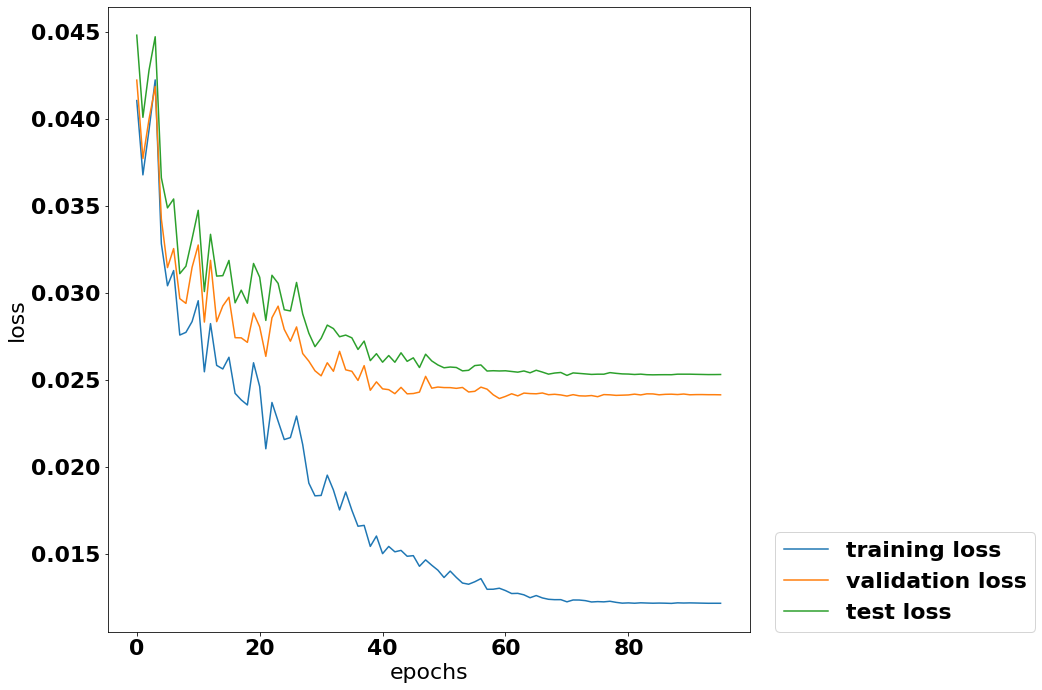

In [9]:
plotter.plot_training_curves('model/sentiment_regressor/loss.tsv', plot_values=['loss'])

Weights plots are saved in model/sentiment_regressor/weights.png


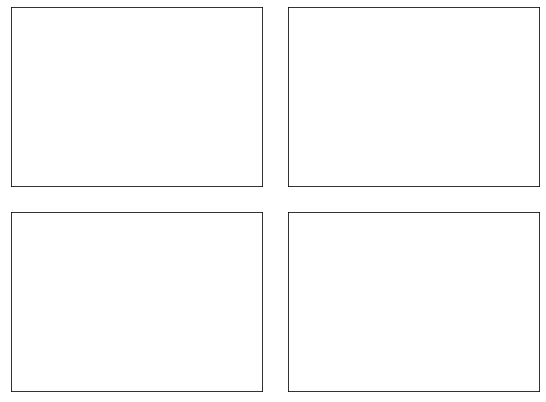

In [10]:
plotter.plot_weights('model/sentiment_regressor/weights.txt')

# testing 

In [11]:
regressor = TextRegressor.load('model/sentiment_regressor/best-model.pt')

2021-01-28 19:47:39,675 loading file model/sentiment_regressor/best-model.pt
2021-01-28 19:47:40,398 Using REGRESSION - experimental


In [12]:
train_eval, train_loss = regressor.evaluate(corpus.train)
train_loss

tensor(0.0130, device='cuda:0')

In [13]:
test_eval, test_loss = regressor.evaluate(corpus.test)
test_loss

tensor(0.0255, device='cuda:0')

In [6]:
for i in range(20):
    print('*'*20)
    print(regressor.predict(corpus.train[i]))

********************
[Sentence: "a stirring , funny and finally transporting re-imagining of beauty and the beast and 1930s horror films"   [− Tokens: 17  − Sentence-Labels: {'class': [4 (1.0)], 'regression': [[3.8751368522644043] (1.0)]}]]
********************
[Sentence: "apparently reassembled from the cutting-room floor of any given daytime soap ."   [− Tokens: 12  − Sentence-Labels: {'class': [1 (1.0)], 'regression': [[0.9098658561706543] (1.0)]}]]
********************
[Sentence: "they presume their audience wo n't sit still for a sociology lesson , however entertainingly presented , so they trot out the conventional science-fiction elements of bug-eyed monsters and futuristic women in skimpy clothes ."   [− Tokens: 35  − Sentence-Labels: {'class': [1 (1.0)], 'regression': [[1.2147924900054932] (1.0)]}]]
********************
[Sentence: "the entire movie is filled with deja vu moments ."   [− Tokens: 10  − Sentence-Labels: {'class': [2 (1.0)], 'regression': [[1.708392858505249] (1.0

In [7]:
regressor.predict(corpus.test[0:3])

[Sentence: "no movement , no yuks , not much of anything ."   [− Tokens: 11  − Sentence-Labels: {'class': [1 (1.0)], 'regression': [[0.8875808715820312] (1.0)]}],
 Sentence: "a gob of drivel so sickly sweet , even the eager consumers of moore 's pasteurized ditties will retch it up like rancid crÃ¨me brÃ»lÃ©e ."   [− Tokens: 26  − Sentence-Labels: {'class': [0 (1.0)], 'regression': [[-0.11567139625549316] (1.0)]}],
 Sentence: "` how many more voyages can this limping but dearly-loved franchise survive ? '"   [− Tokens: 14  − Sentence-Labels: {'class': [2 (1.0)], 'regression': [[1.2057865858078003] (1.0)]}]]

In [8]:
sentences = ["I like the food so much!",
             "That sounds great",
             "Can you do me a favor?",
             "Let's meet at 10am",
             "I have no idea about it",
             "I think it won't work"
            ]

In [9]:
for i in range(len(sentences)):
    sent = Sentence(sentences[i])
    print(regressor.predict(sent))

[Sentence: "I like the food so much !"   [− Tokens: 7  − Sentence-Labels: {'regression': [[2.3020195960998535] (1.0)]}]]
[Sentence: "That sounds great"   [− Tokens: 3  − Sentence-Labels: {'regression': [[2.4725964069366455] (1.0)]}]]
[Sentence: "Can you do me a favor ?"   [− Tokens: 7  − Sentence-Labels: {'regression': [[1.7931777238845825] (1.0)]}]]
[Sentence: "Let 's meet at 10am"   [− Tokens: 5  − Sentence-Labels: {'regression': [[1.845621943473816] (1.0)]}]]
[Sentence: "I have no idea about it"   [− Tokens: 6  − Sentence-Labels: {'regression': [[0.8423361778259277] (1.0)]}]]
[Sentence: "I think it wo n't work"   [− Tokens: 6  − Sentence-Labels: {'regression': [[1.2665587663650513] (1.0)]}]]
